In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('TrainingDataset.csv')

In [ ]:
data.head()

,Outcome_M1,Outcome_M2,Outcome_M3,Outcome_M4,Outcome_M5,Outcome_M6,Outcome_M7,Outcome_M8,Outcome_M9,Outcome_M10,...,Cat_505,Cat_506,Cat_507,Cat_508,Cat_509,Cat_510,Cat_511,Cat_512,Cat_513,Cat_514
0,10000,3000.0,8000.0,3000.0,3000.0,2000.0,2000.0,500.0,500.0,500.0,...,0,0,0,1,0,1,0,0,0,1
1,8000,8000.0,2000.0,3000.0,2000.0,500.0,2000.0,2000.0,3000.0,500.0,...,0,0,0,1,0,0,0,0,0,1
2,5000,15000.0,8000.0,3000.0,3000.0,2000.0,2000.0,2000.0,2000.0,500.0,...,0,0,0,1,0,0,0,0,0,1
3,35000,8000.0,8000.0,5000.0,5000.0,3000.0,2000.0,3000.0,6000.0,2000.0,...,0,0,0,1,0,1,0,0,0,1
4,16000,2000.0,2000.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,0,0,0,1,0,1,0,0,0,1


# 2) EXPLORATORY DATA ANALYSIS

### 2) A - Analyse de forme

**A - 1) Target :** Outcome_M1, ... , Outcome_M2

In [ ]:
#copie de notre données
df = data.copy()

**A - 2) Lignes et colonnes :** 751 lignes, 558 colonnes

In [ ]:
df.shape

(751, 558)

**A - 3) Types de variables :**

    - 521 variables de types integers
    - 37 variables de types float

In [ ]:
(df.dtypes).value_counts()

int64      521
float64     37
dtype: int64

**A - 4) Analyse des valeurs manquantes :** Notre datasets présente 2.76 % de valeus manquantes

In [ ]:
(df.isna().sum()).sum() / df.size * 100

2.7666814617546973

### 2) B - Analyse de fond :  

**B - 1) Visualisation de la target :** Nos target suivent tous une distribution asymétrique

In [ ]:
target = df[df.columns[:12]]

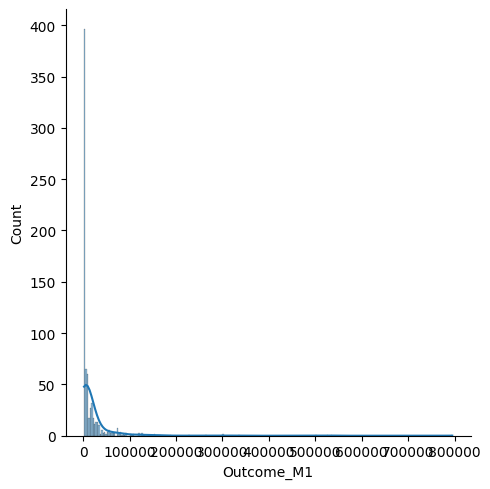

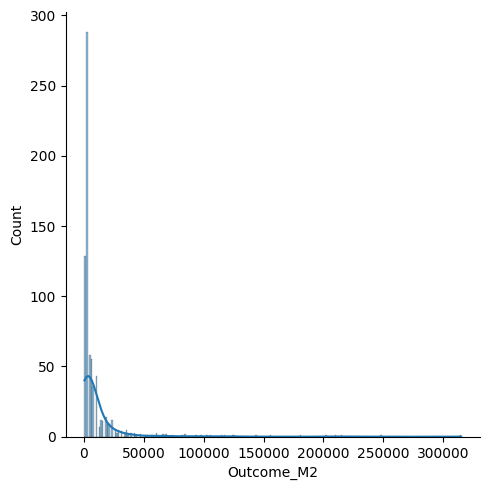

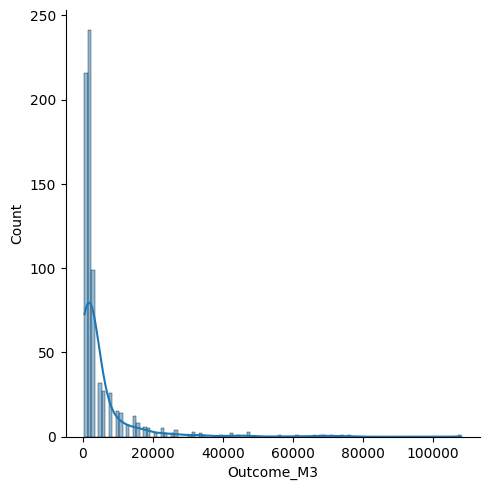

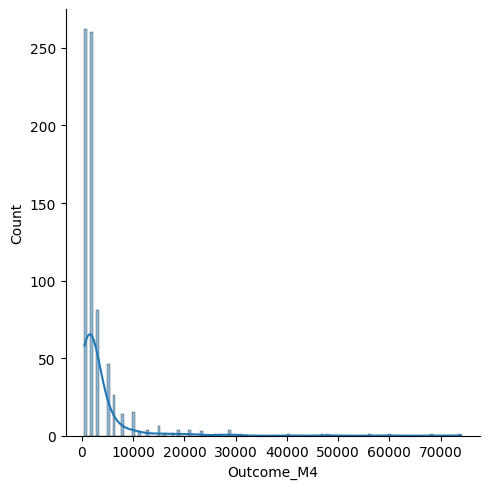

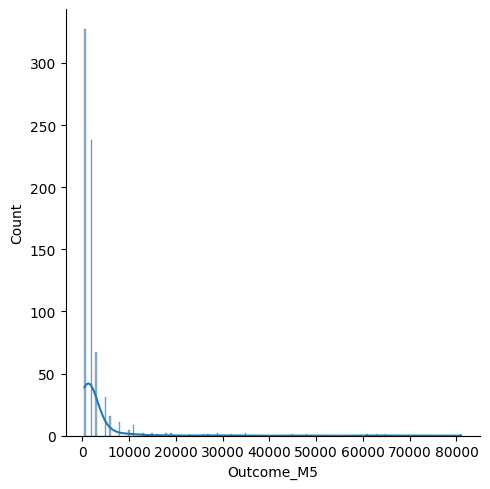

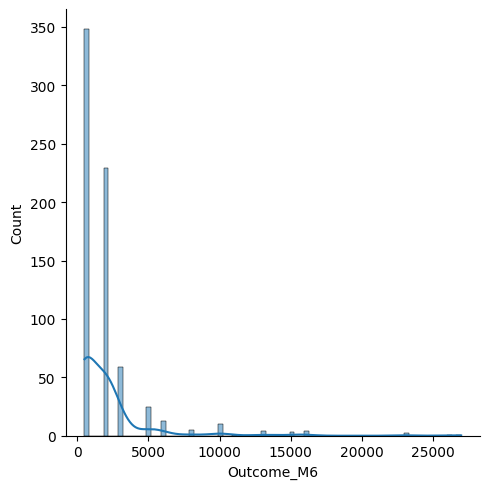

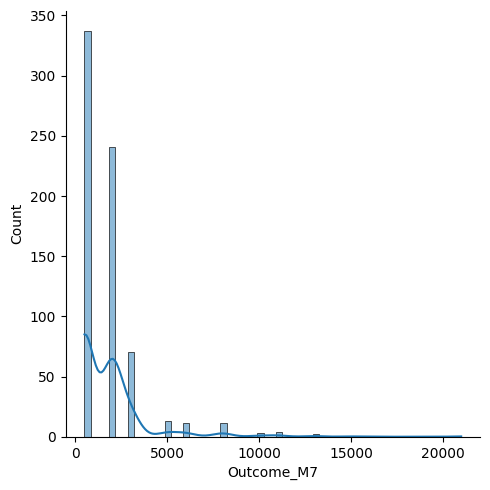

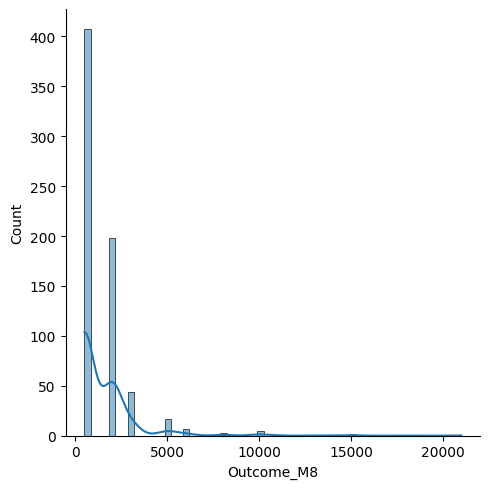

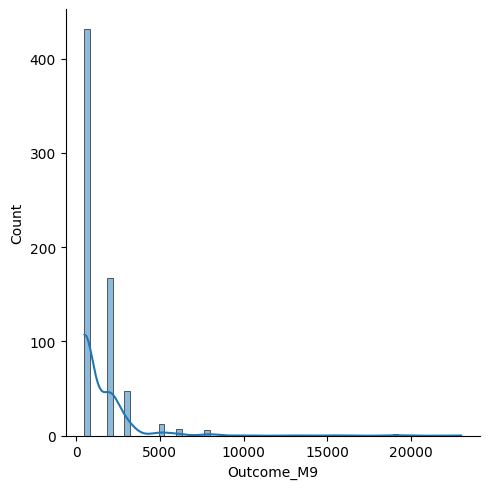

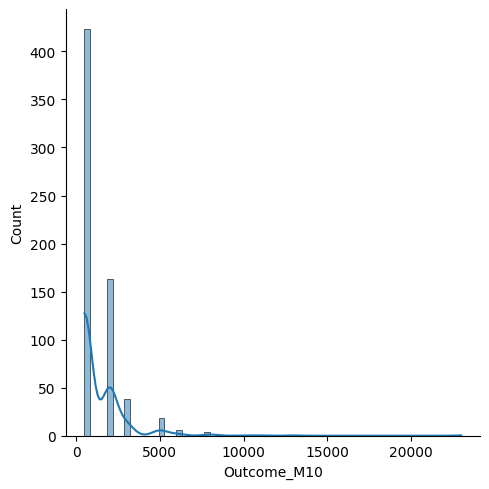

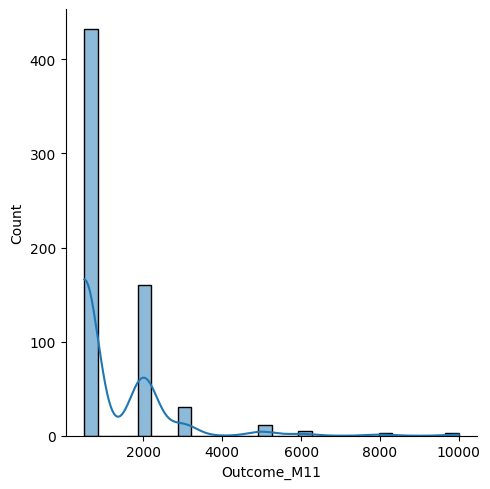

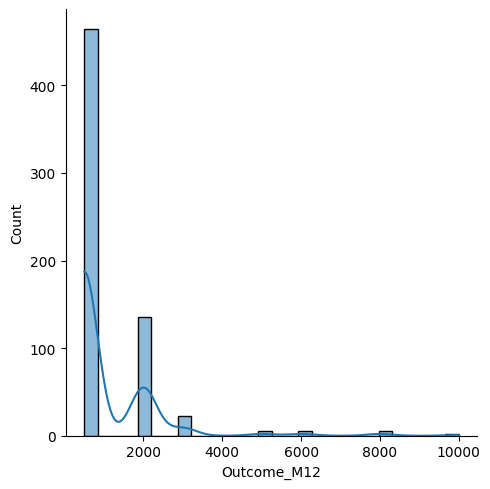

In [ ]:
for col in target.columns:
    sns.displot(target[col], kde=True)

**B - 2) Compréhension des variables :**

- On constate qu'il n'y a des variables qui ont des valeurs constant
- Notres features présente 87.10 % de variables binaire et 12.9 % de variables non binaire

In [ ]:
features = df.drop(target.columns, axis=1)

In [ ]:
#on supprime les variables qui ne varie pas
col_inutile = []
for col in features.columns:
    if len(features[col].unique()) == 1:
        col_inutile.append(col)

features = features.drop(col_inutile, axis=1)

In [ ]:
col_binaire = []
col_non_binaire = []

for col in features.columns:
    if len(features[col].unique()) > 2 :
        col_non_binaire.append(col)
    else :
        col_binaire.append(col)

In [ ]:
features_binaire = features[col_binaire]
features_non_binaire = features[col_non_binaire]

In [ ]:
features_non_binaire.shape[1] / features.shape[1]

0.12895377128953772

In [ ]:
features_binaire.shape[1] / features.shape[1]

0.8710462287104623

<ipython-input-16-dedfd7836206>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


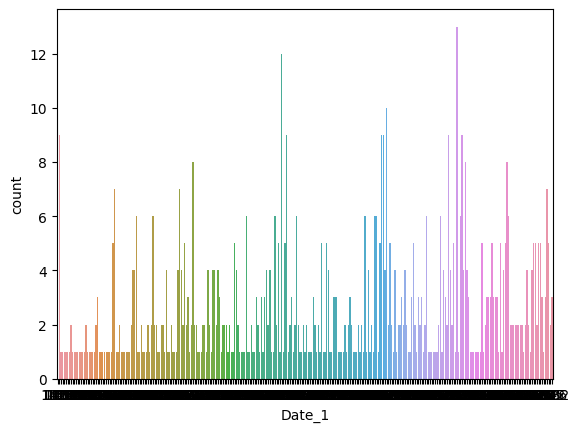

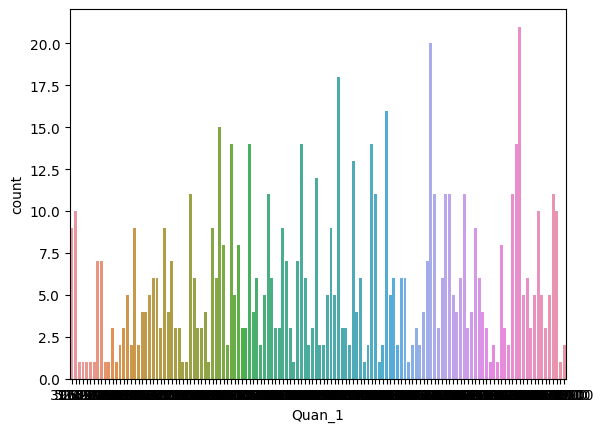

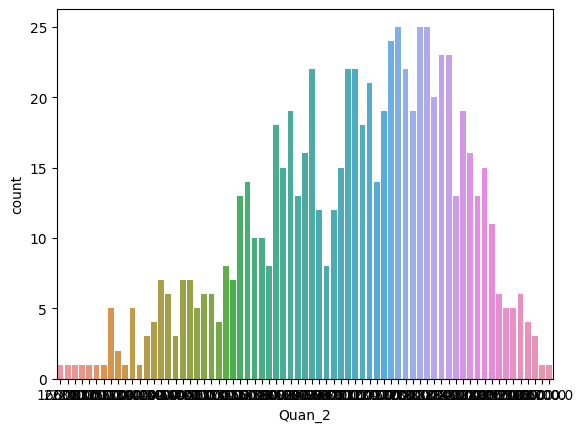

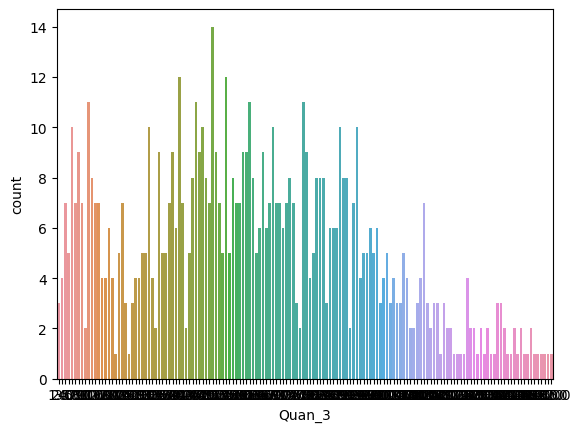

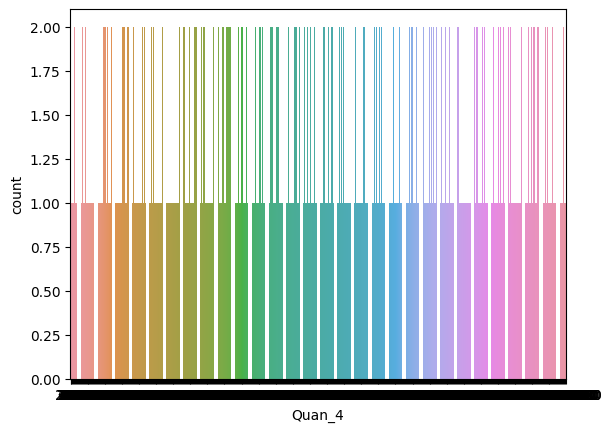

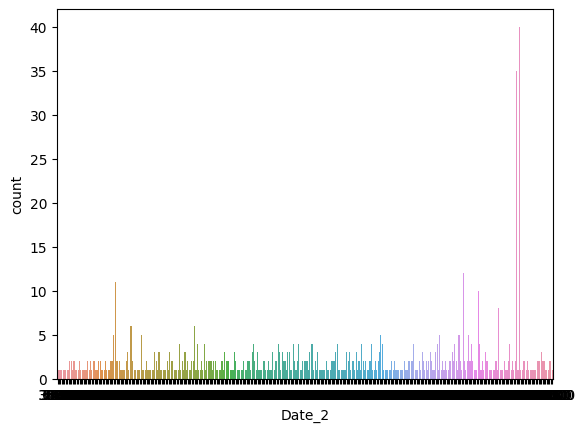

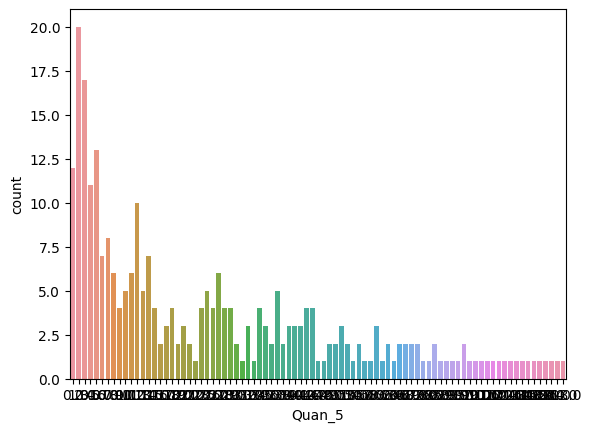

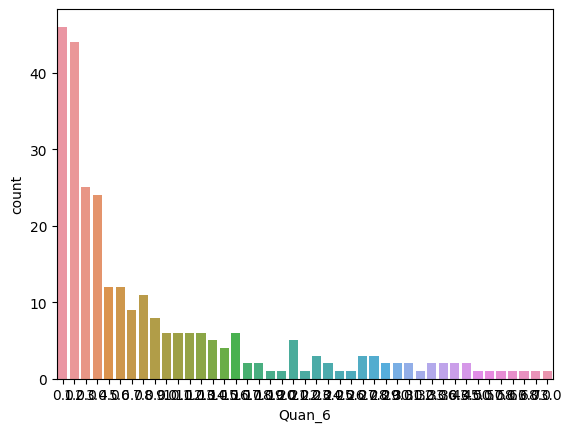

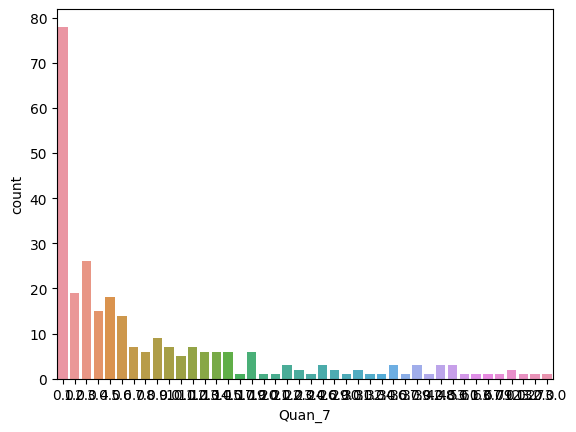

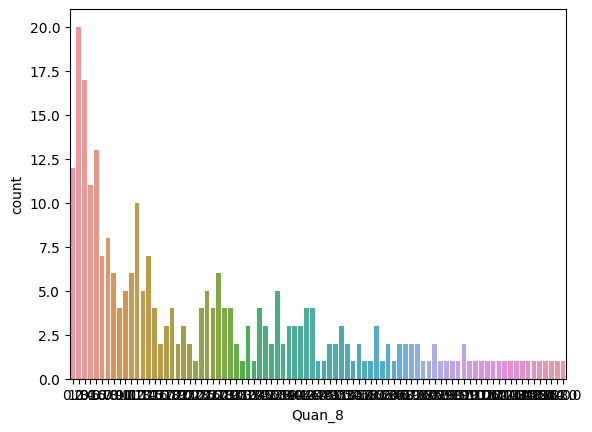

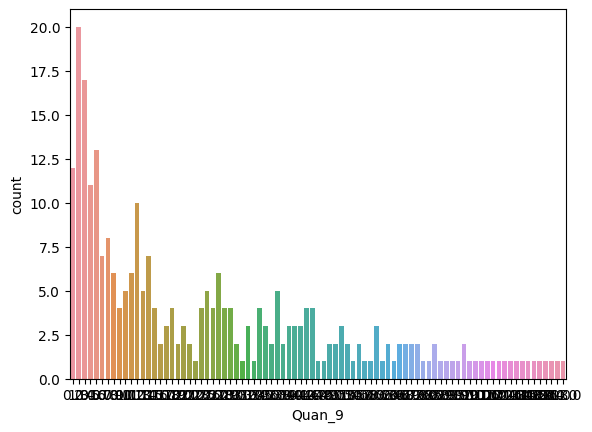

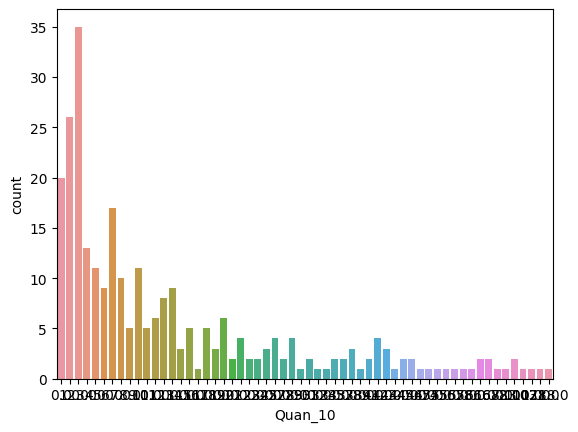

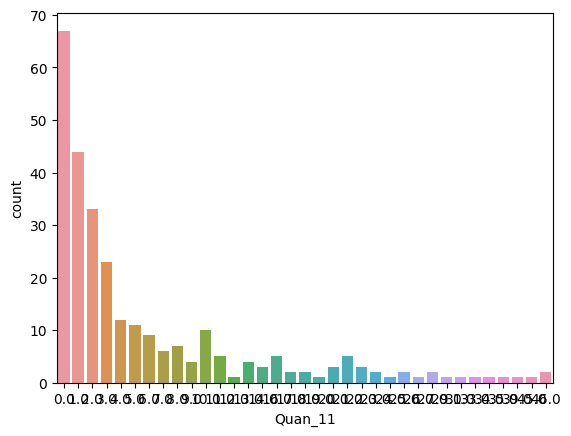

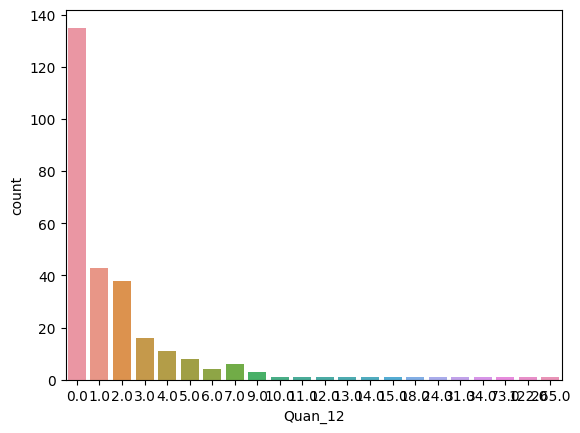

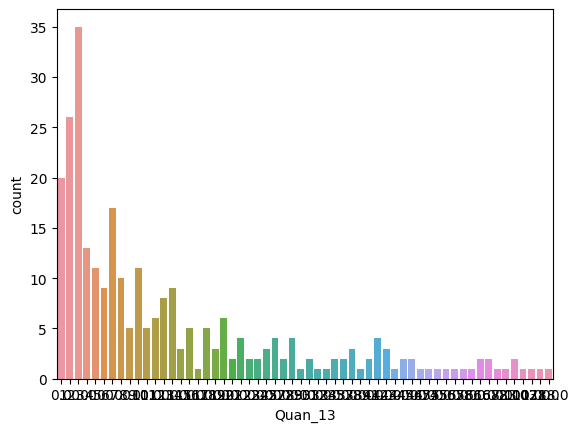

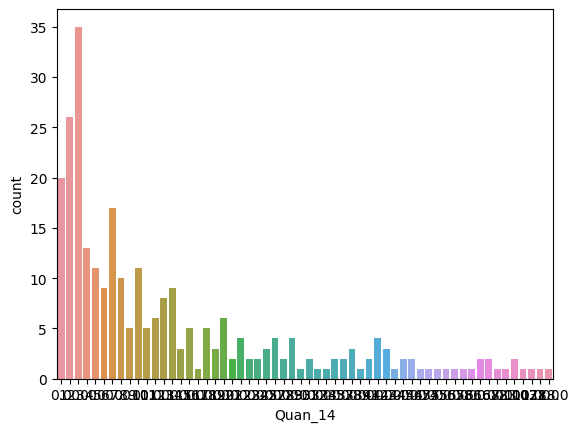

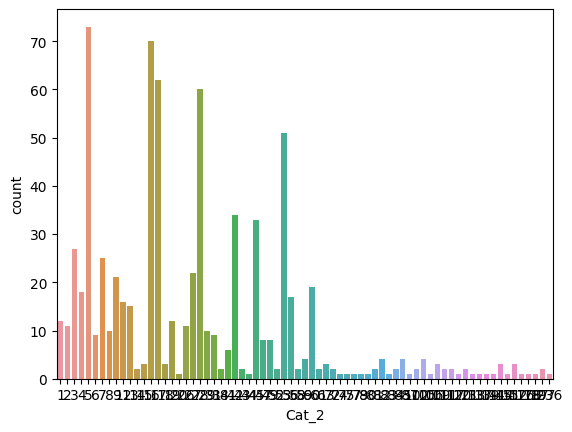

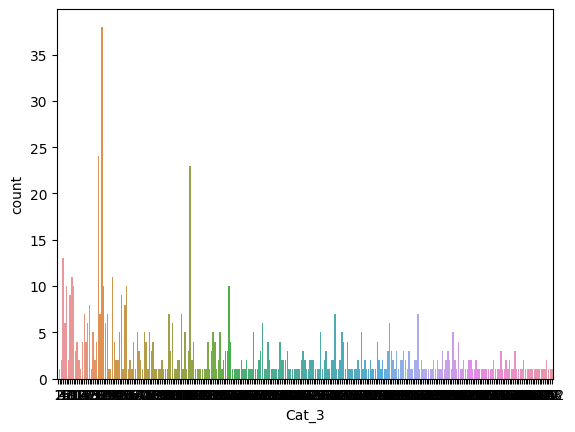

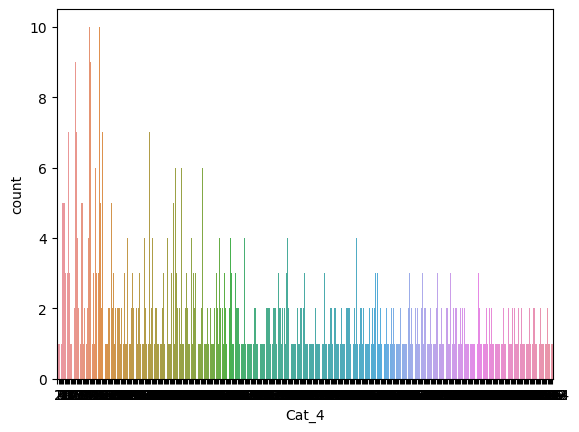

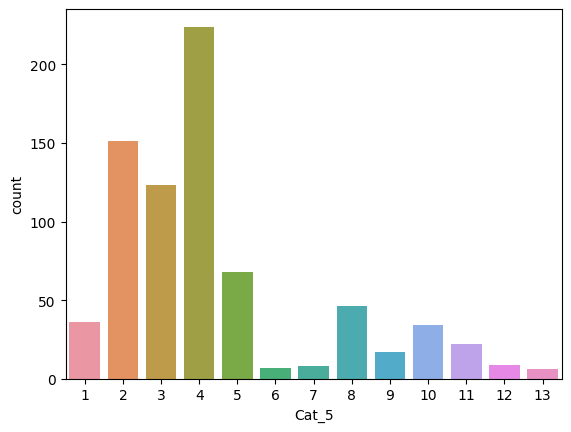

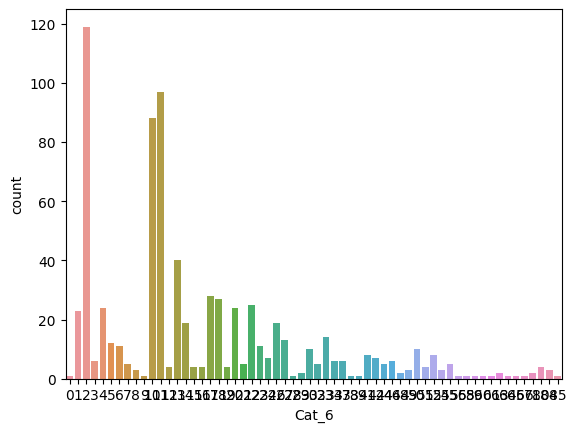

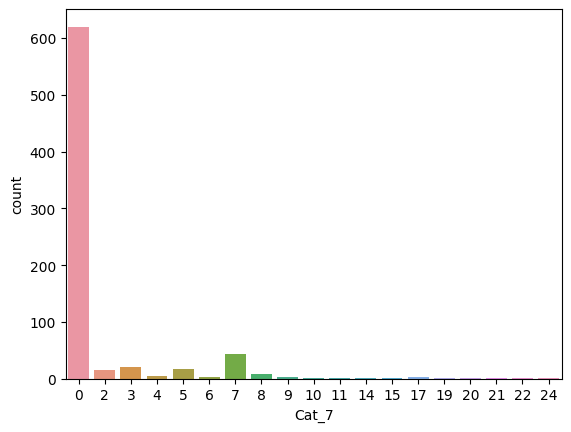

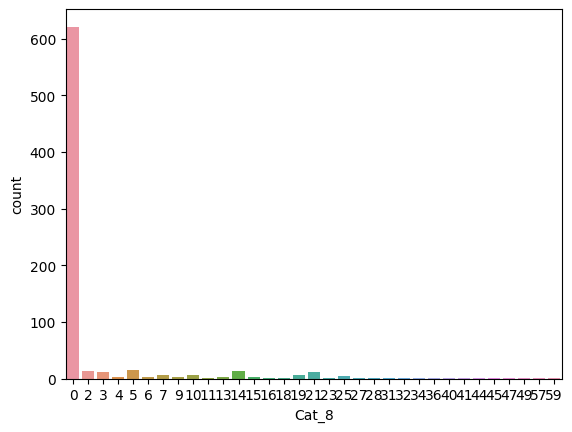

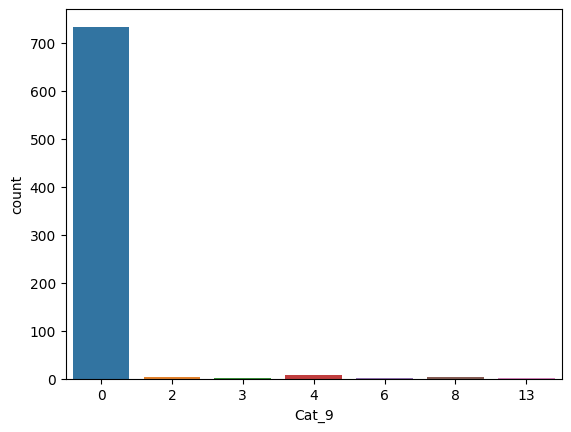

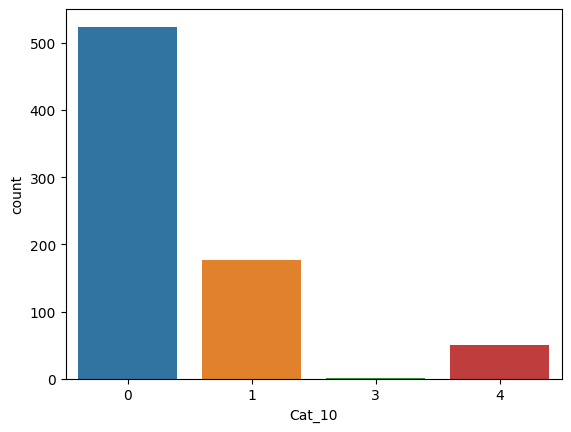

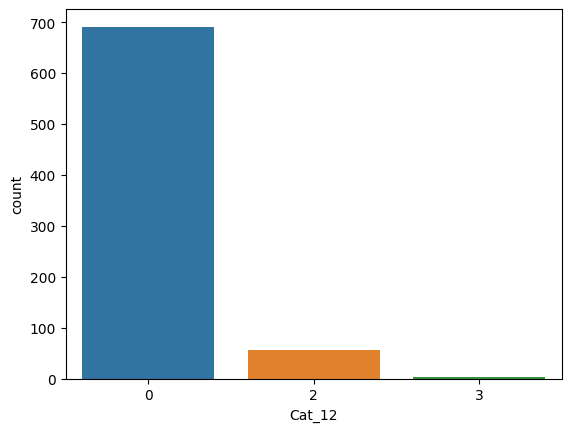

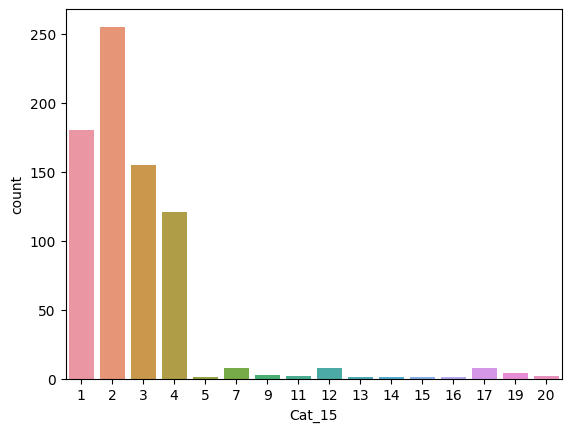

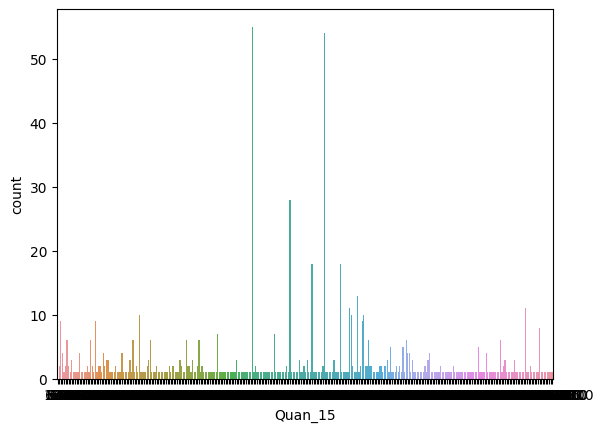

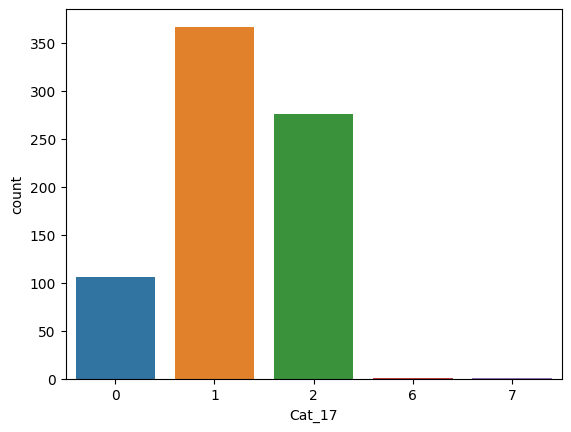

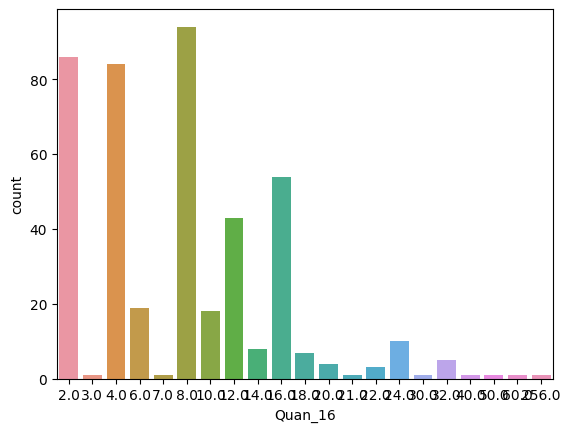

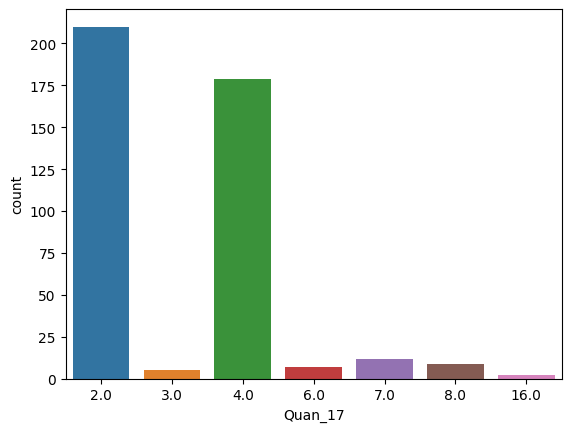

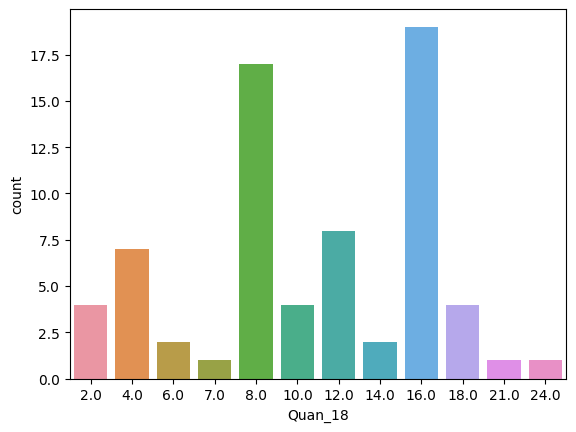

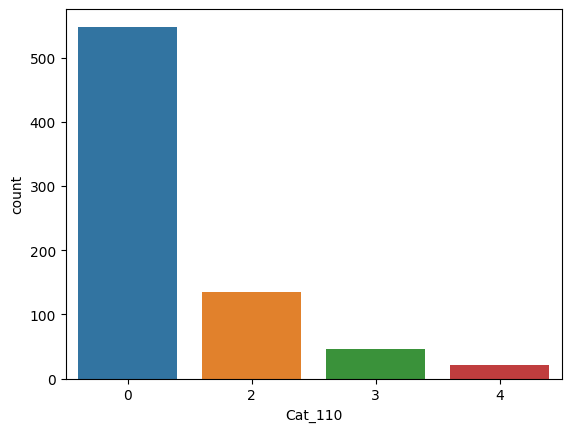

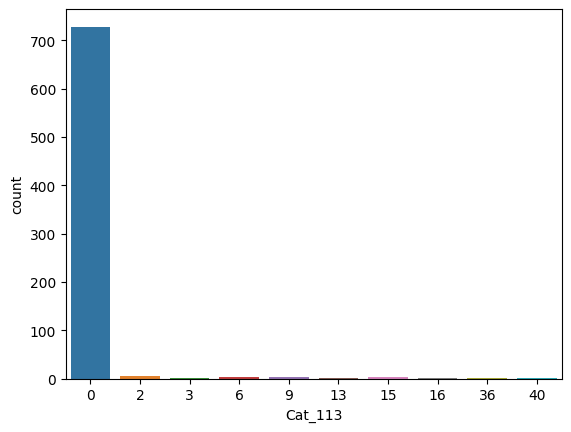

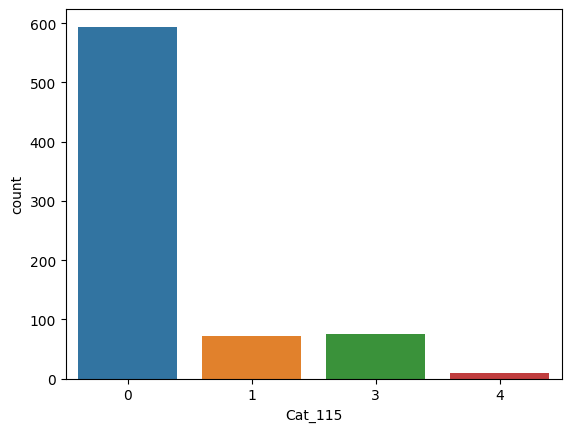

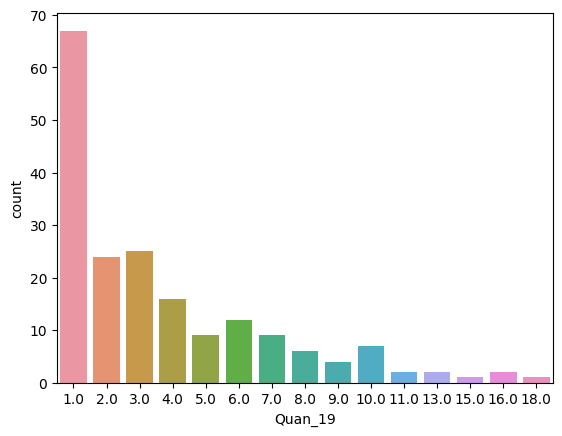

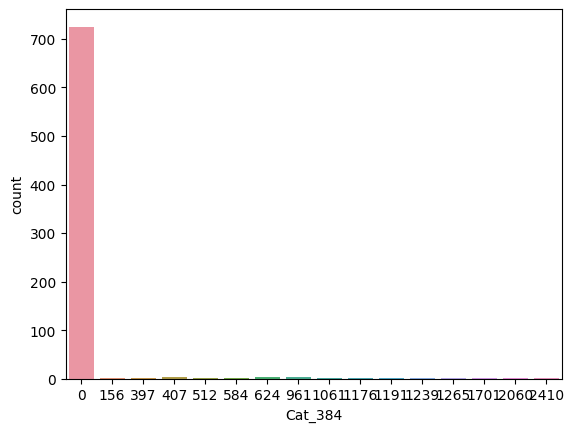

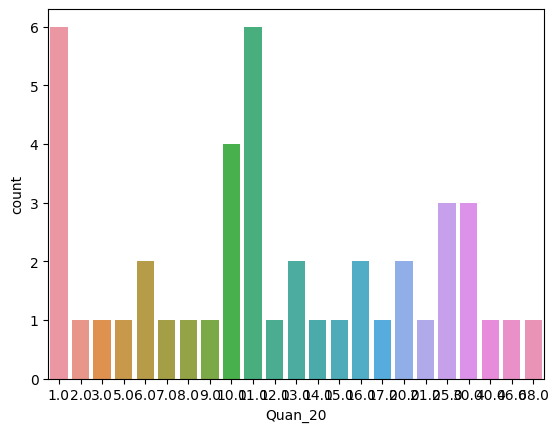

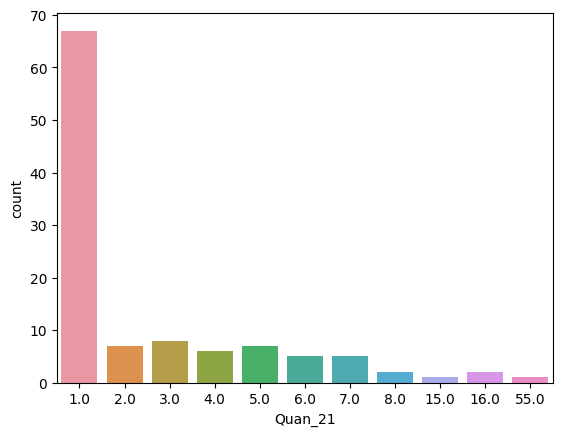

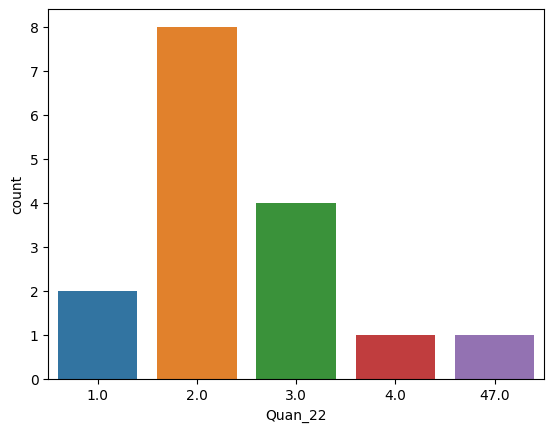

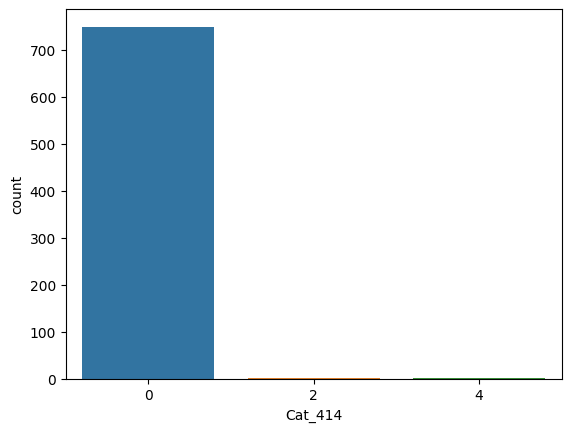

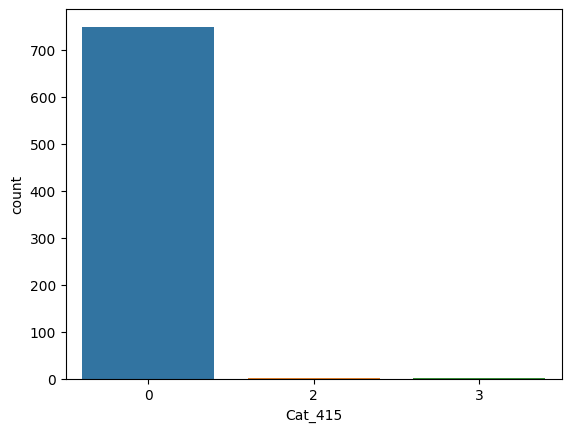

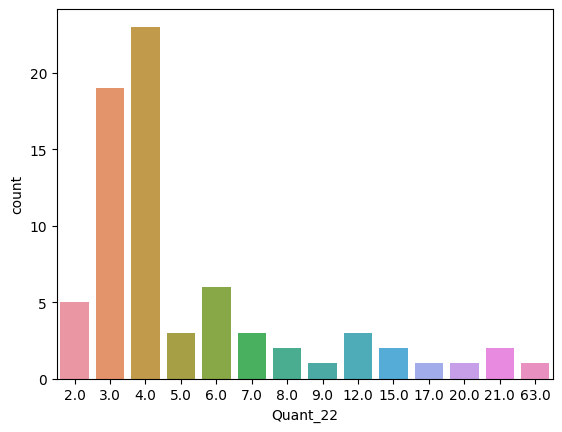

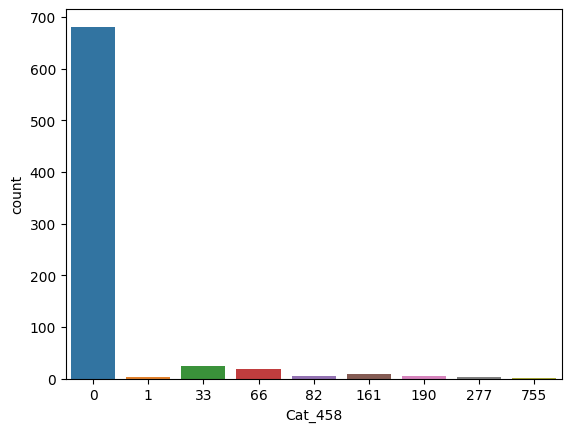

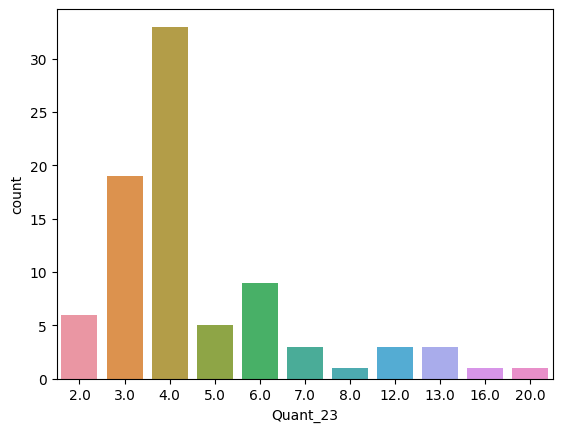

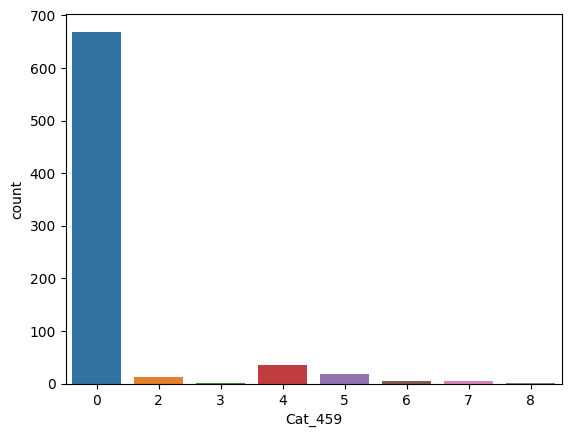

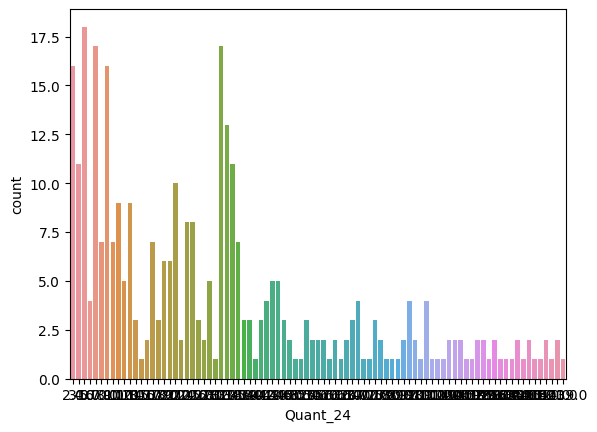

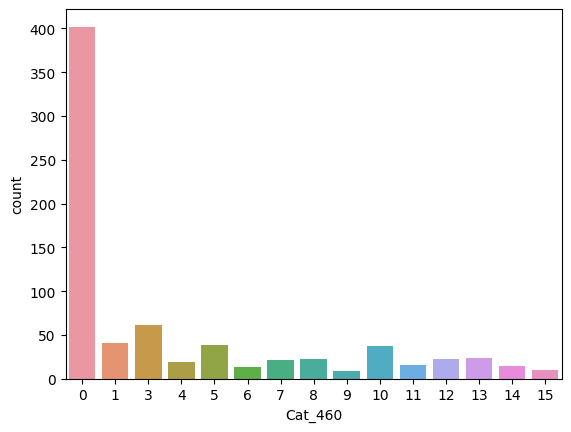

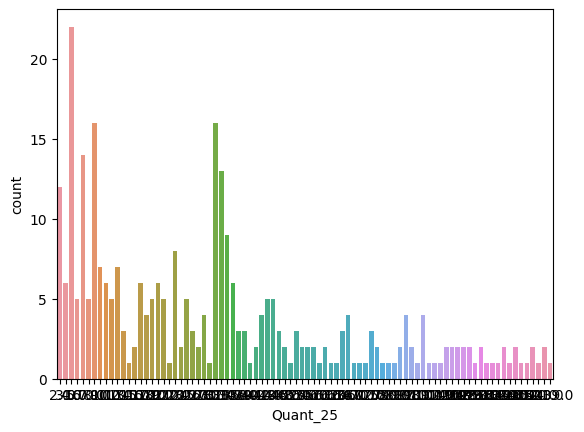

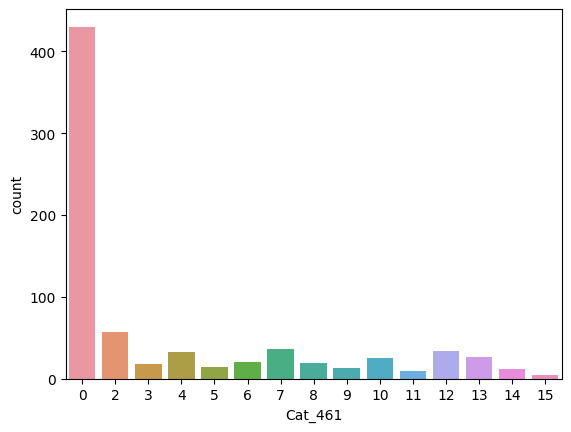

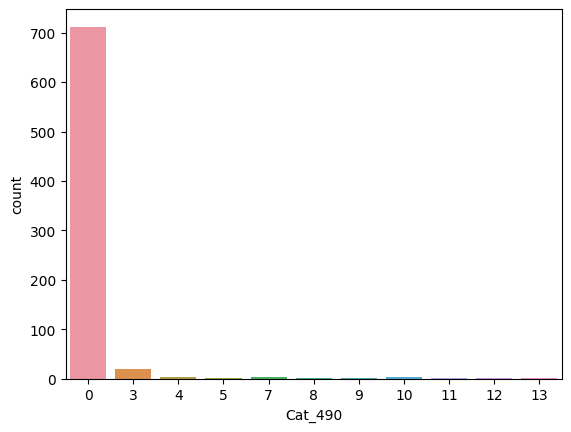

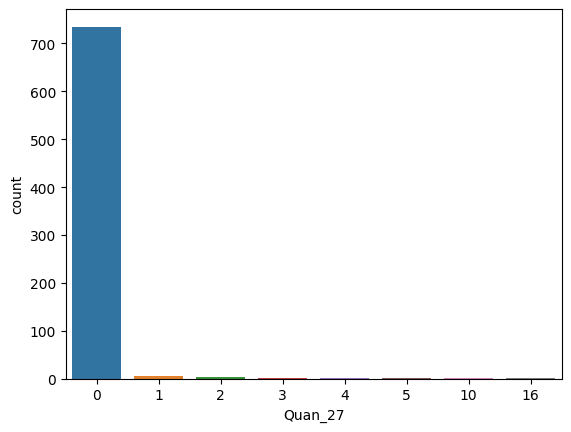

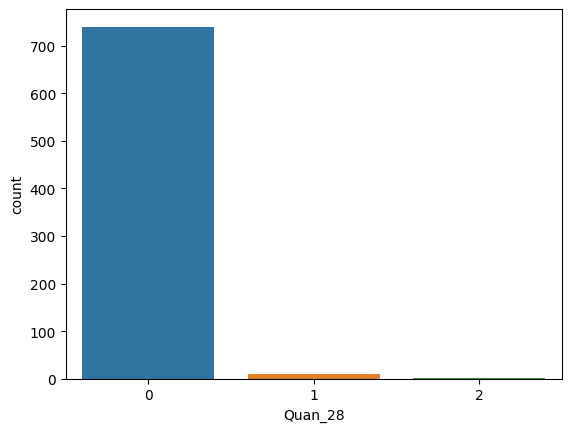

In [ ]:
#visualisation de chaque groupe de features
for col in col_non_binaire:
    plt.figure()
    sns.countplot(x=features_non_binaire[col])

- Les variables à valeur continue suivent à peut pret la même distribution et est difficile à interpréter
- Les variables à valeur discrète quant à lui présenter tous des 1 ou 2 valeurs dominante

In [ ]:
#visualisation des variables catégorique(binaire)
for col in col_binaire:
    plt.figure()
    sns.countplot(x=features_binaire[col])

Output hidden; open in https://colab.research.google.com to view.

- Les variables catégorique (binaire) ne sont pas equilibré, c'est à dire qu'une variables sur deux domine plus que l'autre

**B - 3) Relation target/variables :**

<Axes: >

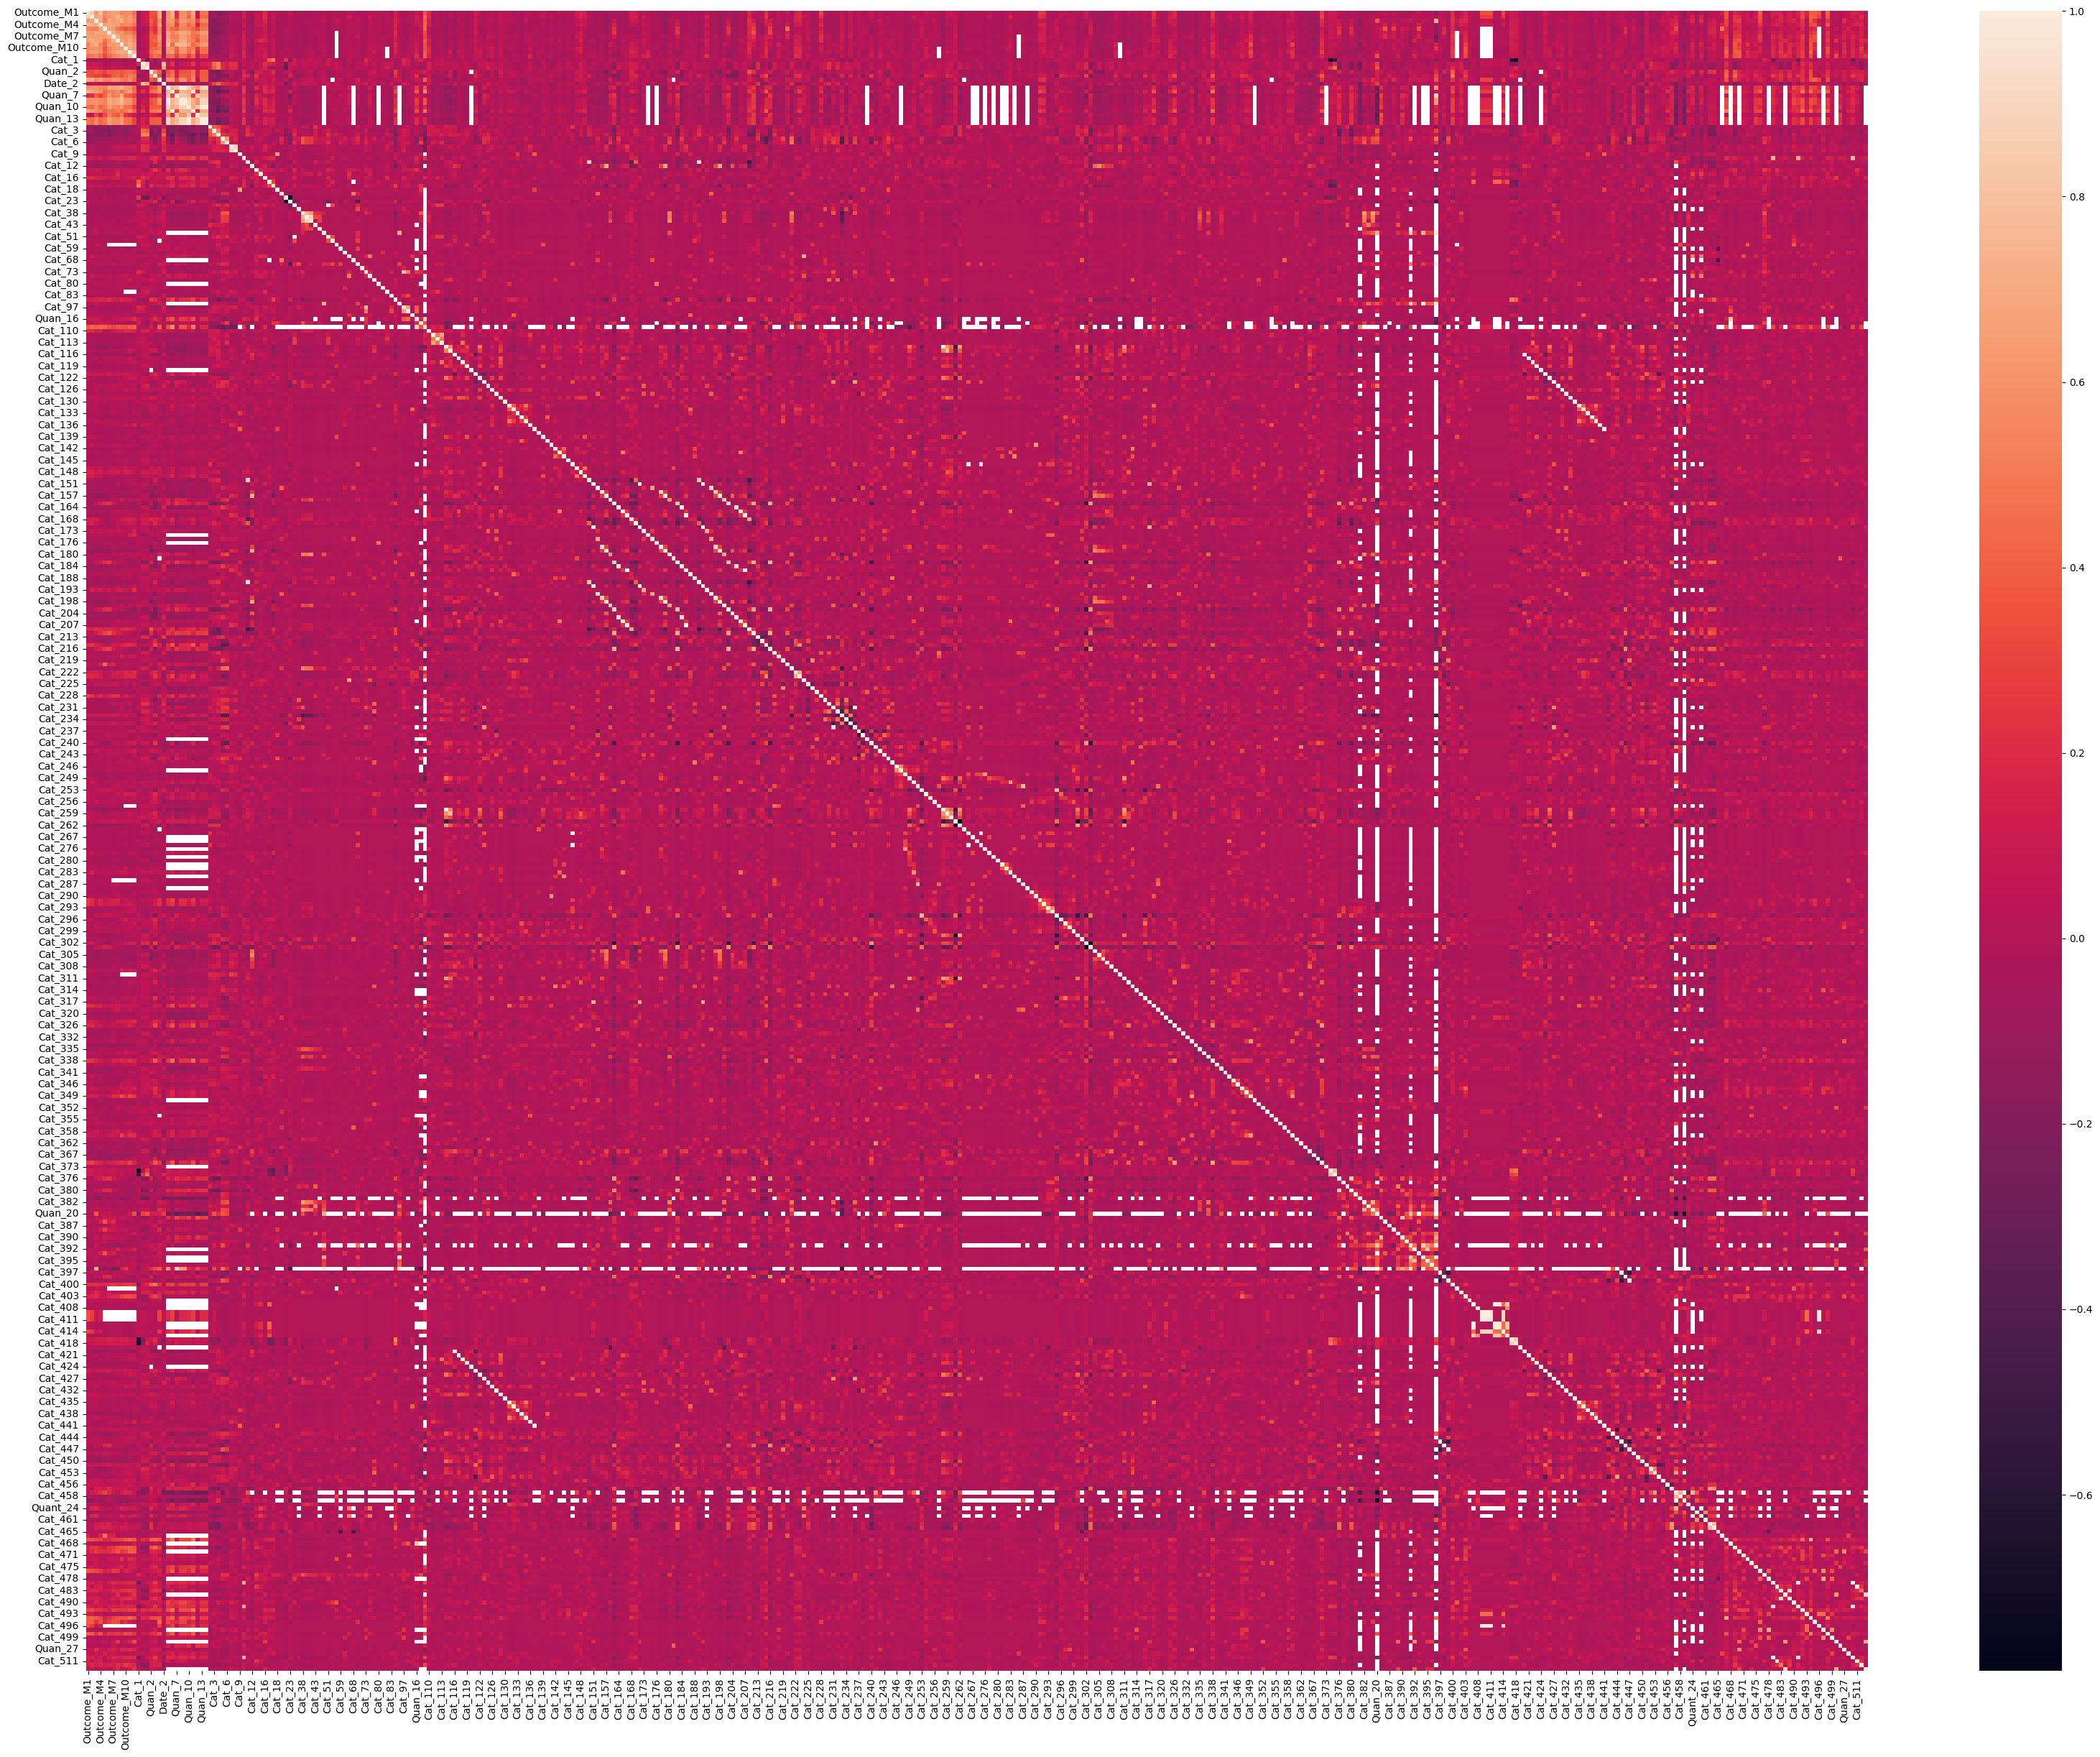

In [ ]:
df = df.drop(col_inutile, axis=1)

plt.figure(figsize=(40, 30))
sns.heatmap(df.corr())

- On constate que, les target présente une forte correlation entre eux(coefficient de correlation > 0.5)
- Majoritairement, nos données ne présente pas une forte correlation avec les targets...certains variables atteitn quand même une coefficient de correlation = 1

# 3) PRE-PROCESSING

In [ ]:
df = data.copy()

In [ ]:
df = df.drop(col_inutile, axis=1)

In [1]:
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

NameError: name 'df' is not defined

In [ ]:
def preprocessing(df):
    for col in df.columns:
        if df[col].isna().sum() > 0:
          break